In [186]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

In [6]:
indkomst = pd.read_csv('indkomstbruttohustypev.csv', encoding='latin')
indkomst.sample(10)

,AAR,BYDEL,DISTRIKTSNAVN,HUSTYP,FAMILIEGRUPPE,FAMILIETYPE,BRUTTOINDKOM,INDKOMSTKATEGORI,HUSTANDE
5078,2007,3,3. Nørrebro,6,Par,Par 2 børn,6,300.000-399.999 kr.,193
1042,2013,5,5. Valby,8,Hustande med 2 eller flere familier,NaN,8,500.000-599.999 kr.,368
1838,2012,7,7. Brønshøj-Husum,4,Par,Par uden børn,7,400.000-499.999 kr.,465
3816,2009,5,5. Valby,6,Par,Par 2 børn,4,150.000-199.999 kr.,15
4529,2008,5,5. Valby,7,Par,Par 3 eller flere børn,7,400.000-499.999 kr.,45
1054,2013,6,6. Vanløse,1,Enlige,Enlige uden børn,10,700.000 kr. og derover,185
3879,2009,6,6. Vanløse,5,Par,Par 1 barn,7,400.000-499.999 kr.,116
6646,2005,6,6. Vanløse,1,Enlige,Enlige uden børn,5,200.000-299.999 kr.,2514
2426,2011,5,5. Valby,7,Par,Par 3 eller flere børn,6,300.000-399.999 kr.,71
6149,2006,8,8. Bispebjerg,8,Hustande med 2 eller flere familier,NaN,9,600.000-699.999 kr.,224


In [12]:
alder = pd.read_csv('./befkbhalderstatkode.csv', encoding='latin')
alder.sample(10)

,AAR,BYDEL,ALDER,STATKODE,PERSONER
245603,2006,3,11,5120,5
338619,2002,4,13,5472,14
205502,2008,5,76,5134,1
177283,2009,4,41,5269,1
529284,1992,2,26,5180,5
115887,2011,1,75,5492,1
498410,1994,3,4,5222,2
288012,2004,1,57,5160,3
286266,2005,99,41,5152,1
93268,2012,3,36,5432,3


In [10]:
statsborgerskab = pd.read_csv('./statsborgerskabskode.csv')
statsborgerskab.head()

,Gyldig fra,Gyldig til,Kode,Tekst
0,01-01-1600,31/12/9999,0,Uoplyst (1)
1,01-01-1600,31/12/9999,5001,Uoplyst (2)
2,01-01-1600,31/12/9999,5100,Danmark
3,01-01-1600,31/12/9999,5101,Grønland
4,01-01-1600,31/12/9999,5102,Udlandet uoplyst


In [13]:
merged = pd.merge(alder, statsborgerskab, left_on='STATKODE', right_on='Kode')
merged.head()

,AAR,BYDEL,ALDER,STATKODE,PERSONER,Gyldig fra,Gyldig til,Kode,Tekst
0,2015,1,0,5100,614,01-01-1600,31/12/9999,5100,Danmark
1,2015,1,1,5100,540,01-01-1600,31/12/9999,5100,Danmark
2,2015,1,2,5100,485,01-01-1600,31/12/9999,5100,Danmark
3,2015,1,3,5100,469,01-01-1600,31/12/9999,5100,Danmark
4,2015,1,4,5100,452,01-01-1600,31/12/9999,5100,Danmark


In [18]:
filtered = merged[['AAR', 'BYDEL', 'ALDER', 'PERSONER']]
filtered.sample(20).sort_values(by=['AAR'])

,AAR,BYDEL,ALDER,PERSONER
363112,1994,8,41,1
99479,1996,3,4,1
44035,1997,3,56,1
120836,1998,2,25,4
209881,1998,5,40,8
58000,1999,10,78,1
541545,2001,9,23,1
32237,2001,10,61,1
56508,2001,9,42,3
355154,2003,1,22,1


In [84]:
grouped = filtered \
    .groupby(['AAR','BYDEL']) \
    .apply(lambda df: np.average(df['ALDER'], weights=df['PERSONER']))
grouped = grouped.to_frame()\
    .stack()\
    .reset_index()\
    .drop(columns=['level_2'])\
    .rename(columns={0: 'wavg'})
grouped.head()


,AAR,BYDEL,wavg
0,1992,1,39.167878
1,1992,2,40.555664
2,1992,3,35.982781
3,1992,4,37.589815
4,1992,5,42.121086


In [25]:
# roder er en administrativ inddeling af KBH der bruges af kommunen ifm. statistik 
bydele = pd.read_csv('./bydel.csv')
bydele.head()

,FID,id,bydel_nr,navn,areal_m2,wkb_geometry
0,bydel.1,3,3,Nørrebro,4107635,MULTIPOLYGON (((12.537042934706966 55.69652730...
1,bydel.2,4,4,Vesterbro-Kongens Enghave,8452555,MULTIPOLYGON (((12.545533157947562 55.63972112...
2,bydel.3,1,1,Indre By,10373009,MULTIPOLYGON (((12.611486015458533 55.69763139...
3,bydel.4,2,2,Østerbro,9837057,MULTIPOLYGON (((12.597771770241584 55.70348097...
4,bydel.5,8,8,Bispebjerg,6830467,MULTIPOLYGON (((12.538304314312807 55.72644044...


In [89]:
final = pd.merge(grouped, bydele, left_on='BYDEL', right_on='bydel_nr').rename(columns={'wkb_geometry': 'geometry'})
selected = final[['AAR','navn','wavg','bydel_nr', 'geometry']]
selected.head()

,AAR,navn,wavg,bydel_nr,geometry
0,1992,Indre By,39.167878,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
1,1993,Indre By,39.037728,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
2,1994,Indre By,38.809495,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
3,1995,Indre By,38.570659,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
4,1996,Indre By,38.391430,1,MULTIPOLYGON (((12.611486015458533 55.69763139...


In [105]:
geo = geopandas.GeoDataFrame(selected)
geo.head()

,AAR,navn,wavg,bydel_nr,geometry
0,1992,Indre By,39.167878,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
1,1993,Indre By,39.037728,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
2,1994,Indre By,38.809495,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
3,1995,Indre By,38.570659,1,MULTIPOLYGON (((12.611486015458533 55.69763139...
4,1996,Indre By,38.391430,1,MULTIPOLYGON (((12.611486015458533 55.69763139...


In [116]:
geo[geo['AAR']==1992]['wavg']

0      39.167878
24     40.555664
48     35.982781
72     37.589815
96     42.121086
120    42.892109
144    43.006531
168    46.012264
192    39.909745
216    39.646252
Name: wavg, dtype: float64

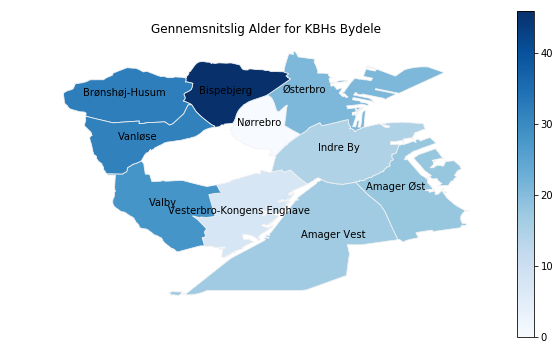

In [211]:
kbh = geopandas.read_file('./bydel/bydel.shp')
kbh_merged = kbh.merge(geo[geo['AAR']==1992][['bydel_nr', 'wavg']], left_on='id', right_on='bydel_nr')
kbh_merged.head()
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')
ax.set_title("Gennemsnitslig Alder for KBHs Bydele")
max_age = kbh_merged['wavg'].max()
norm = plt.Normalize(vmin=0, vmax=max_age)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm._A = []
cbar = fig.colorbar(sm)
kbh_merged.plot(column='wavg', cmap='Blues', ax=ax, linewidth=0.8, edgecolor='0.95')
for idx, row in kbh_merged.iterrows():
#     plt.annotate(s=row['navn'], xy=row['geometry'].centroid.coords[0], ha='center')
    plt.annotate(s=row['navn'], xy=row['geometry'].representative_point().coords[0], ha='center')
#     plt.annotate(s=row['wavg'], xy=row['geometry'].representative_point().coords[0], ha='center')
    

46.012263607564556